# The Basics: Training my first Neural Network

1. We will use tensorflow
2. Keras is integrated into tf
3. Train with the given data
4. Improve the model with added data




The problem we want to solve is to convert from Celsius to Farenheit, where the approximate formula  is:

                         f=c*1.8+32 

of course it would be simple enough to create a conventional Python function that directly performs the calculation but that wouldn't be machine learning.

Instead we will give Tensorflow some sample celsius values(0,8,15,22,38) and their corresponding Farenheit values(32,45,59,72,100). Then we will train a model that figures out the above formula through the training process

# Import dependencies


In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

In [3]:
import numpy as np
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

## Setting up Training Data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs.
Since the task in this Codelab is to create a model that can give the temperature in Farenheit when given the degrees in Celsius, we create two lists celsius_q and farenheit_a that we can use to train our model.

In [5]:
celsius_q = np.array([-40,-5,0,8,16,25,40,50],dtype=float)
fahrenheit_a= np.array([-40,23,32,46.4,60.8,77,104,122],dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degree Celsius= {} degrees Fahrenheit".format(c,fahrenheit_a[i]))

-40.0 degree Celsius= -40.0 degrees Fahrenheit
-5.0 degree Celsius= 23.0 degrees Fahrenheit
0.0 degree Celsius= 32.0 degrees Fahrenheit
8.0 degree Celsius= 46.4 degrees Fahrenheit
16.0 degree Celsius= 60.8 degrees Fahrenheit
25.0 degree Celsius= 77.0 degrees Fahrenheit
40.0 degree Celsius= 104.0 degrees Fahrenheit
50.0 degree Celsius= 122.0 degrees Fahrenheit


**Machine Language Terminology** \
**Feature**- The input(s) to our model. In this case, a single value-the degrees in Celsius.\
 **Labels**- The output our model predicts.In this case a single value- the degrees in Fahrenheit.

 Example- a pair of inputs/outputs used during training.In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (25,72).

## Create the model

Next we create the model. We will use the simplest possible model, a **Dense Network**. Since the problem is straightforward, this network will require only a single layer,with a single neuron

### Build a layer

We'll call the layer 'l0' and create it by instantiating 'tf.keras.layers.Dense' with the following configuration.



*   input_shape=[1]- This specifies that the input to this layer is a single value. That is , the shape is a one-dimensional array with one member.Since this is the first(and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degree Celsius.



*   units=1- This specifies the number of neurons in the layer.The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem.Since this is the final layer, it is also the size of the model's output- a single float value representing degrees Fahrenheit.(In a multi layered network, the sizeand shape of the layer would need to match the 'input_shape' of the next layer.)





In [6]:
l0=tf.keras.layers.Dense(units=1,input_shape=[1])

## Assemble layers into the model

Once the layers are defined , they need to be assembled into a model. the Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

The model has  just a single layer, ID.


In [7]:
model=tf.keras.Sequential([l0]) #here we have just a single layer in our model

## Compile the model with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:



*   Loss function- A way of measuring how far off predictions are from the desired outcome( the measured difference is  called a "loss")

*   Optimiser Function- A way of adjusting internal values in order to reduce the loss.



In [8]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training to first calculate the loss at each point and then improve it. In fact , the act of calculating the current loss of a model and then improving it is precisely what the training is.

During training the optimizer function is used to calculate the adjustments to the model's internal variables. The goal is to adjust the internal variables until the model(which is a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow  uses numerical analysis to perform this tuning and all this complexity is hidden.

The loss function(mean squared error) and the optimizer(Adam) used here are standard for simple models like this one, but many others are available.

One of the most important part of the model is the learning  rate , it is the step size taken when adjusting values in the model. if the value is too small,it will take too many iterations to train the model. While if it's too large the accuracy goes down. Finding a good value for it requires a lot of trial and error but the default for it is 0.001 and 0.1

## Train The Model

We train the model by calling the .fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables called **"weights"** and output values which are meant to be the Fahrenheit equivalent. Since intially the weights are set randomly so the output tends not to be close to the actual value. The difference between the output and the actual value is given by the loss function and the optimizer function directs how the weights need to be adjusted.

This cycle of calculate,compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs.The **epochs** arguement specifies how many times this cycle should be run and the verbose argument controls how much output the method produces.

In [9]:
history=model.fit(celsius_q,fahrenheit_a, epochs=1000,verbose=False)
print("Finished training the model")

Finished training the model


## Display the training statistics

the fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the fahrenheit degrees that the model predicts is far from the corresponding value in farenheit_a.


Now we will use **Matplotlib** to visualize this.

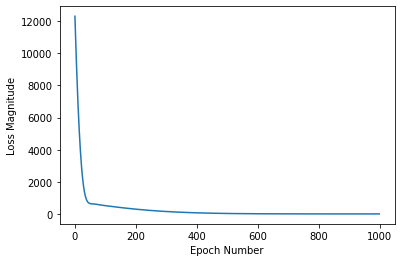

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

We can see from the above graph that our model improves very quickly at first and then has a steady, slow improvement until it is very near perfect towards the end.

In [11]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 67ms/step
[[212.10114]]


Now we use the .predict method to predict the fahrenheit value for  a previously unknown Celsius degree. 

We try to predict the Fahrenheit value for 100 degree Celsius.




### To review



*   We  created a model with a Dense Layer

*   we trained it with 3500 examples(i.e 7 pairs 500 epochs initially ) 

our model tuned the variables(weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value.



## Looking at the layer weights

In [12]:
print("these are the layer variables: {}".format(l0.get_weights()))

these are the layer variables: [array([[1.8032843]], dtype=float32), array([31.77271], dtype=float32)]


The first variable is close to 1.8 and the second to 32.These values are the actual variables in the real conversion formula.

Here we dont need multiple layers but we create more Dense Layers with different units, which therefore also as more variables.

In [13]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 53ms/step
[[211.99998]]
1/1 [==============================] - 0s 27ms/step
Model predicts that 100 degrees Celsius is: [[211.99998]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.41128027, -0.6179163 ,  0.05485622,  0.2290001 ]],
      dtype=float32), array([ 3.8768895, -3.8098903,  3.5635562,  3.2287405], dtype=float32)]
These are the l1 variables: [array([[ 0.38678637,  0.12586805,  0.37671503,  1.2632776 ],
       [-0.59016293, -0.968681  , -0.0168617 , -0.2149758 ],
       [ 0.681713  , -0.39222074, -0.44785255,  1.0747533 ],
       [ 0.29587662,  0.41757923, -0.879666  ,  0.6447792 ]],
      dtype=float32), array([ 2.5339463,  3.0679965, -3.468573 ,  3.5172145], dtype=float32)]
These are the l2 variables: [array([[ 0.6535448 ],
       [ 0.7078349 ],
       [-0.36233556],
       [ 0.9944273 ]], dtype=float32), array([3.215206], dtype=float32)]
